<ipython-input-3-3abd5829e0ba>:4: DeprecationWarning: Please import `distance_transform_edt` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.morphology import distance_transform_edt  # Correct import for distance transform from scipy


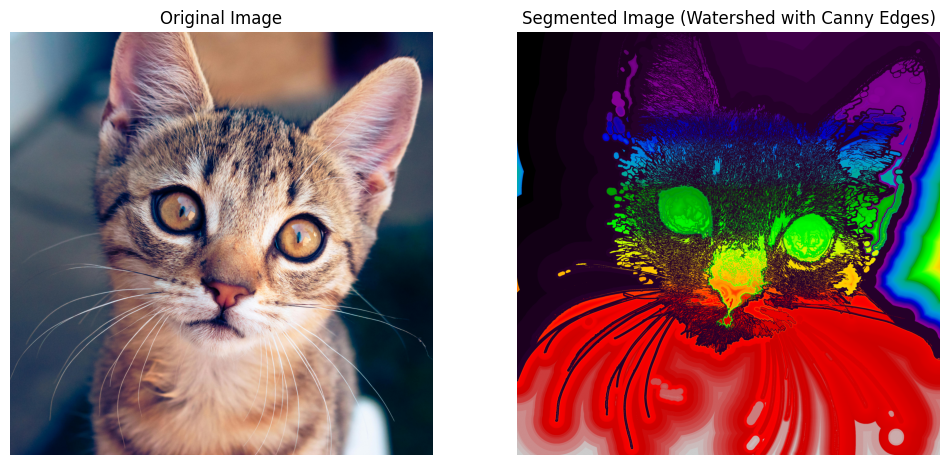

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, measure, segmentation, feature
from scipy.ndimage.morphology import distance_transform_edt  # Correct import for distance transform from scipy
from skimage.io import imread  # To read the custom image

# Load your custom image (replace with the path to your image)
image_path = 'pic.jpg'  # Change this to your image file path
sample_image = imread(image_path)

# If the image is RGB, convert it to grayscale for segmentation
sample_image_gray = color.rgb2gray(sample_image)

# Step 1: Apply Canny edge detection to highlight boundaries
edges = feature.canny(sample_image_gray)

# Step 2: Generate markers for watershed algorithm (distance transform on the edges)
# First, we perform a dilation of edges to make sure markers are prominent
distance = distance_transform_edt(~edges)  # Invert edges before distance transform

# Step 3: Apply watershed segmentation
markers = measure.label(distance)
segmentation_result = segmentation.watershed(-distance, markers)

# Visualize the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

# Segmentation result
plt.subplot(1, 2, 2)
plt.imshow(segmentation_result, cmap='nipy_spectral')
plt.title("Segmented Image (Watershed with Canny Edges)")
plt.axis('off')

plt.show()
